In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

import h5py 

import jax.numpy as jnp

sys.path.append('../')
from main import * 
from plot_utils import *

In [2]:
dic_attrs = {}
dic_arr = {}
with h5py.File(DATAPATH) as f:
    keys = f.keys()
    print(keys)
    for key in keys:
        arr = jnp.array(f[key][:])

        if 'te' in key:
            arr = jnp.where(arr==0, jnp.nan, arr)
        else:
            arr = arr * 1e-3
        
        arr = arr[:-1, ...]
        dic_arr[key] = arr

    attrs = f.attrs.keys()
    print(attrs)
    for attr in attrs:
        dic_attrs[attr] = f.attrs[attr]

<KeysViewHDF5 ['te_high', 'te_low', 'vz_high', 'vz_low']>


2024-10-27 21:57:13.075485: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:1513] failed to alloc 134217728 bytes on host: INTERNAL: CUDA error: : CUDA_ERROR_INVALID_VALUE: invalid argument


<KeysViewHDF5 ['cellsize', 'metadata', 'simulation', 'units', 'version']>


In [3]:
x = jnp.linspace(0, L, N, endpoint=False)
y = x.copy()

X, Y = jnp.meshgrid(x, y, indexing='ij')

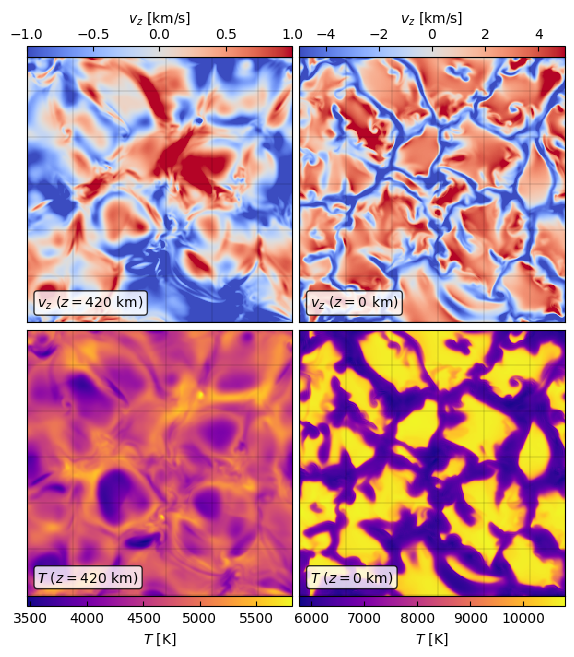

In [4]:
size = 7

fig, axs = plt.subplots(2, 2, figsize=(size * 1, size))
plt.subplots_adjust(wspace=0.01, hspace=0.03)

labels = ['$z=0$ km', '$z=420$ km']
alpha = 0.8
idx = 0

cmap_v = "coolwarm"

vlim_v = 1
im00 = axs[0, 0].pcolormesh(
    X, Y, dic_arr["vz_high"][idx, ...], cmap=cmap_v, vmin=-vlim_v, vmax=vlim_v
)
cmap = plt.get_cmap(cmap_v)
vlim = np.linspace(-vlim_v, vlim_v, 10)
norm = colors.Normalize(vmin=-vlim_v, vmax=vlim_v)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(vlim)
pos = axs[0, 0].get_position()
cbar_ax = fig.add_axes([pos.x0 * 1.025, pos.y1, pos.width * 0.983, 0.015])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation="horizontal")
cbar_ax.tick_params(
    bottom=False, top=True, labelbottom=False, labeltop=True, direction="in"
)
cbar_ax.xaxis.set_label_position("top")
cbar_ax.set_xlabel(r"$v_z$ [km/s]")
axs[0, 0].text(
    0.04,
    0.04,
    f"$v_z$ ({labels[1]})",
    ha="left",
    va="bottom",
    transform=axs[0, 0].transAxes,
    fontsize=10,
    c="k",
    bbox=dict(
        facecolor="white", edgecolor="black", boxstyle="round,pad=0.25", alpha=alpha
    ),
)


vlim_v = 5
im01 = axs[0, 1].pcolormesh(
    X, Y, dic_arr["vz_low"][idx, ...], cmap=cmap_v, vmin=-vlim_v, vmax=vlim_v
)
cmap = plt.get_cmap(cmap_v)
vlim = np.linspace(-vlim_v, vlim_v, 10)
norm = colors.Normalize(vmin=-vlim_v, vmax=vlim_v)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(vlim)
pos = axs[0, 1].get_position()
cbar_ax = fig.add_axes([pos.x0 * 1.005, pos.y1, pos.width * 0.985, 0.015])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation="horizontal")
cbar_ax.tick_params(
    bottom=False, top=True, labelbottom=False, labeltop=True, direction="in"
)
cbar_ax.xaxis.set_label_position("top")
cbar_ax.set_xlabel(r"$v_z$ [km/s]")
axs[0, 1].text(
    0.04,
    0.04,
    f"$v_z$ ({labels[0]})",
    ha="left",
    va="bottom",
    transform=axs[0, 1].transAxes,
    fontsize=10,
    c="k",
    bbox=dict(
        facecolor="white", edgecolor="black", boxstyle="round,pad=0.25", alpha=alpha
    ),
)

te_high = dic_arr["te_high"][idx, ...]
cmap_t = "plasma"
vmin_t = np.min(te_high)
vmax_t = np.max(te_high)

im10 = axs[1, 0].pcolormesh(X, Y, te_high, cmap=cmap_t, vmin=vmin_t, vmax=vmax_t)
cmap = plt.get_cmap(cmap_t)
vlim = np.linspace(vmin_t, vmax_t, 10)
norm = colors.Normalize(vmin=vmin_t, vmax=vmax_t)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(vlim)
pos = axs[1, 0].get_position()
height = 0.015
cbar_ax = fig.add_axes([pos.x0 * 1.025, pos.y0 - height, pos.width * 0.983, 0.015])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation="horizontal")
cbar_ax.tick_params(
    bottom=False, top=True, labelbottom=False, labeltop=True, direction="in"
)
cbar_ax.tick_params(bottom=True, labelbottom=True, top=False, labeltop=False)
cbar_ax.set_xlabel(r"$T$ [K]")
axs[1, 0].text(
    0.04,
    0.04,
    f"$T$ ({labels[1]})",
    ha="left",
    va="bottom",
    transform=axs[1, 0].transAxes,
    fontsize=10,
    c="k",
    bbox=dict(
        facecolor="white", edgecolor="black", boxstyle="round,pad=0.25", alpha=alpha
    ),
)


te_low = dic_arr["te_low"][idx, ...]
cmap_t = "plasma"
vmin_t = np.min(te_low)
vmax_t = np.max(te_low)
im11 = axs[1, 1].pcolormesh(X, Y, te_low, cmap=cmap_t, vmin=vmin_t, vmax=vmax_t)
cmap = plt.get_cmap(cmap_t)
vlim = np.linspace(vmin_t, vmax_t, 10)
norm = colors.Normalize(vmin=vmin_t, vmax=vmax_t)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(vlim)
pos = axs[1, 1].get_position()
height = 0.015
cbar_ax = fig.add_axes([pos.x0 * 1.005, pos.y0 - height, pos.width * 0.985, 0.015])
cbar = fig.colorbar(sm, cax=cbar_ax, orientation="horizontal")
cbar_ax.tick_params(
    bottom=False, top=True, labelbottom=False, labeltop=True, direction="in"
)
cbar_ax.tick_params(bottom=True, labelbottom=True, top=False, labeltop=False)
cbar_ax.set_xlabel(r"$T$ [K]")
axs[1, 1].text(
    0.04,
    0.04,
    f"$T$ ({labels[0]})",
    ha="left",
    va="bottom",
    transform=axs[1, 1].transAxes,
    fontsize=10,
    c="k",
    bbox=dict(
        facecolor="white", edgecolor="black", boxstyle="round,pad=0.25", alpha=alpha
    ),
)

for ax in axs.ravel():
    ax.grid(
        which="major",
        linewidth=0.25,
        color="k",
        alpha=0.5,
    )
    ax.set_aspect("equal")

for i in range(2):
    axs[i, 1].tick_params(left=False, labelleft=False)  # , right=True, labelright=True)
    axs[i, 0].tick_params(left=False, labelleft=False)
for i in range(2):
    axs[0, i].tick_params(bottom=False, labelbottom=False)
    axs[1, i].tick_params(bottom=False, labelbottom=False)

savepath = '../figures/plot_1.png'
fig.savefig(savepath, dpi=300, bbox_inches='tight')

In [1]:
import numpy as np